# AK4183 Model Risiko II dan Simulasi

### **Tugas 03 - 11 Oktober 2022**

Oleh:
* Matthew Henry Prasetya NIM. 10819009
* Jason Hadinata Putra NIM. 10819013

#### 1. Pilihlah suatu fungsi peluang univariat yang berbeda antarkelompok.

a. Tulis fungsi peluang, fungsi distribusi, fungsi kuantil, dan fungsi pembangkit momen dari fungsi peluang tersebut.

Misal $X$ peubah acak yang berdistribusi sesuai distribusi yang dipilih. Fungsi peluang, distribusi, kuantil, dan pembangkit momennya secara berturut-turut diberikan oleh:

\begin{align*}
f(x)&=\theta x, x \in \left\langle 0, \sqrt{\frac{2}{\theta}} \right\rangle, \theta > 0; \\ 
F(x) &= \int_{0}^{x} {\theta t}~\mathrm{d}t = \left. \frac{\theta t^2}{2} \right|_0^x = \frac{\theta x^2}{2}; \qquad F^{-1}(p)= {\sqrt{\frac{2p}{\theta}}}, p\in[0,1]; \\
M_X(t) &=E[e^{tX}] = \int_{0}^{\sqrt{\frac{2}{\theta}}} {e^{tx} \cdot \theta x}~\mathrm{d}x = \left. \frac{\theta x e^{tx}}{t} - \frac{\theta e^{tx}}{t^2} \right|_0^{\sqrt{\frac{2}{\theta}}} = \frac{\theta {\sqrt{\frac{2}{\theta}}} e^{t{\sqrt{\frac{2}{\theta}}}}}{t}-\frac{\theta e^{t{\sqrt{\frac{2}{\theta}}}}}{t^2}+\frac{\theta}{t^2}.
\end{align*}

b. Konstruksi algoritma pembangkitan sampel acak dari distribusi tersebut.

<!-- $a$ -->
<ol>
    <li>Bangkitkan secara uniform sebuah bilangan real antara 0 dan 1, misal $p$</li>
    <li>Realisasi sampel acak yang bersesuaian adalah $x=F^{-1}(p)$</li>
    <li>Kembali ke langkah pertama hingga ukuran sampel sesuai dengan yang diinginkan</li>
</ol>

c. Hitung nilai ekspektasi dengan hasil (b). Apakah nilai ekspektasinya bisa dijadikan kandidat penaksir momen dari parameter distribusi tersebut?

Dipilih parameter $\theta=1$.

In [ ]:
import numpy as np
import random

SEED = 42
THETA = 1
SAMPLE_SIZE = int(1e6)

random.seed(SEED)

sum = 0
for i in range(SAMPLE_SIZE):
    u = random.uniform(0,1)
    sum += np.sqrt(2/THETA * u)

xbar = sum/SAMPLE_SIZE
print(f"Rata-rata sampel adalah: {xbar}")

Rata-rata sampel adalah: 0.942893018091159


Ekspektasi dari $X$ diberikan oleh
\begin{align*}
E[X] &= \int_{0}^{\sqrt{\frac{2}{\theta}}} {x \cdot \theta x}~\mathrm{d}x = \theta \int_{0}^{\sqrt{\frac{2}{\theta}}} {x^{2}}~\mathrm{d}x = \theta \cdot \left. \frac{1}{3}x^{3} \right|_{x=0}^{x=\sqrt{\frac{2}{\theta}}} = \frac{1}{3} \theta \left(\sqrt{\frac{2}{\theta}}\right)^{3} = \frac{2\sqrt{2}}{3\sqrt{\theta}}
\end{align*}
sehingga $\theta = \frac{8}{9E[X]^{2}}$.

Karena $E[X]$ ditaksir oleh $\bar{x}$, $\theta$ dapat ditaksir dengan metode momen oleh statistik $\hat{\theta}=\frac{8}{9\bar{x}^{2}}$. Namun, penaksir momen tersebut tak bias secara asimtotik (Ben) sehingga nilai ekspektasi tersebut bisa dijadikan kandidat penaksir momen dari parameter distribusi yang dipilih. Taksiran $\theta$ oleh sampel acak adalah $0.9998218827207306$. Perlu diperhatikan bahwa penaksir momen tersebut bias karena $\hat{\theta}=\frac{8}{9\bar{x}^{2}}$ cekung ke atas sehingga penaksir momen tersebut bias berdasarkan pertidaksamaan Jensen,

\begin{align*}
E[\hat{\Theta}] &= E \left[ \frac{8}{9\bar{X}^{2}} \right] > \frac{8}{9E[\bar{X}]^{2}} = \theta.
\end{align*}

#### 2. Diberikan data frekuensi klaim $\mathbf{n}$ yang bisa diakses dari https://bit.ly/2022-modris2-tugas03-dataset.

a. Konstruksikan fungsi likelihood, $\mathcal{L}(\theta \mid \mathbf{n})$, dari distribusi Binomial, Poisson, dan Binomial Negatif dengan ${\theta}$ sebagai (vektor) parameter.

Misal $f$ adalah fungsi massa peluang dan $l$ adalah fungsi log-likelihood.

<!-- $a$ -->
<table>
    <tr>
        <th style="text-align:center">Distribusi</th>
        <th style="text-align:center">$f(n)$</th>
        <th style="text-align:center">$\mathcal{L}(\theta\mid\mathbf{n})$</th>
        <th style="text-align:center">$l(\theta\mid\mathbf{n})$</th>
    </tr>
    <tr>
        <td>Poisson</td>
        <td>
            \begin{equation*}
                \frac{e^{-\theta}\theta^{n}}{n!}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                \prod_{i=1}^{k} \frac{e^{-\theta}\theta^{n_{i}}}{n_{i}!}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                -k\theta + \ln(\theta)\sum_{i=1}^{k}n_{i} - \sum_{i=1}^{k}\ln(n_{i}!)
            \end{equation*}
        </td>
    </tr>
    <tr>
        <td>Binomial</td>
        <td>
            \begin{equation*}
                C_{n}^r p^{n}(1-p)^{r-n}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                \prod_{i=1}^{k} C_{n_{i}}^r p^{n_{i}}(1-p)^{r-n_{i}}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                \sum_{i=1}^{k}\ln{C_{n_{i}}^r} + \ln(p)\sum_{i=1}^{k}n_{i} + \sum_{i=1}^{k}({r-n_{i}})\ln(1-p)
            \end{equation*}
        </td>
    </tr>
    <tr>
        <td>Binomial Negatif</td>
        <td>
            \begin{equation*}
                C_{r-1}^{n+r-1} p^{r}(1-p)^{n}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                \prod_{i=1}^{k} C_{r-1}^{n_{i}+r-1} p^{r}(1-p)^{n_{i}}
            \end{equation*}
        </td>
        <td>
            \begin{equation*}
                \sum_{i=1}^{k}\ln{C_{r-1}^{n_{i}+r-1}} + \ln(p)\sum_{i=1}^{k}r + \sum_{i=1}^{k}{n_{i}}\ln(1-p)
            \end{equation*}
        </td>
    </tr>
</table>

b. Buatlah suatu algoritma numerik untuk mencari $\theta$ yang memaksimumkan fungsi likelihood. Buat simulasinya dan bandingkan jawaban dengan nilai penaksir likelihood analitik serta berikan analisis perbandingan dari hasil yang diperoleh.

Digunakan algoritma random search yang dimodifikasi sebagai berikut. Misal terdapat fungsi $f: \mathbb{R}^{p} \to \mathbb{R}$ yang akan dimaksimumkan dengan cara berikut:
<ol>
    <li>Bangkitkan taksiran awal $\mathbf{x}_{0} \in \mathbb{R}^{p}$.</li>
    <li>Tentukan nilai learning rate/radius pencarian untuk iterasi ke-$i$, $\alpha_{i}$.</li>
    <li>Bangkitkan sejumlah hingga vektor acak $\mathbf{y}_{j} \in \mathbb{R}^{p}$ yang elemen-elemennya berdistribusi normal baku dan saling bebas.</li>
    <li>Hitung $\mathbf{d}_{j}=\frac{1}{r_{j}}\mathbf{y}_{j}$ dengan $r_{j}=\sqrt{\sum_{i=1}^{p}{[\mathbf{y}_{j}]_{i}^{2}}}$ dan $[\mathbf{y}_{j}]_{i}$ elemen ke-$i$ dari vektor $\mathbf{y}_{j}$ (Marsaglia, 1972).</li>
    <li>Tentukan $\mathbf{x}_{i+1}=\mathbf{x}_{i}+\alpha_{i}\mathbf{d}_{j}$ sedemikian sehingga $f(\mathbf{x}_{i}+\alpha_{i}\mathbf{d}_{j}) > f(\mathbf{x}_{i})$. Jika tidak ada, $\mathbf{x}_{i+1}=\mathbf{x}_{i}$.</li>
    <li>Hentikan iterasi jika $\alpha_{i}<\epsilon$ dan $f(\mathbf{x}_{i+1})-f(\mathbf{x}_{i})=\Delta_{i} < \epsilon$ untuk suatu nilai galat $\epsilon > 0$. Jika tidak terpenuhi, kembali ke langkah 2 dan lanjutkan untuk iterasi $i+1$.</li>
</ol>

Agar algoritma berhasil, $(\alpha_{i})$ harus konvergen ke nol dan $\sum(\alpha_{i})$ divergen. Kekonvergenan $(\alpha_{i})$ menjamin panjang "langkah" di iterasi ke-$i$, $\left| \alpha_{i}\mathbf{d}_{j} \right|=|\alpha_{i}|$, menuju nol yang mana menjamin kekonvergenan barisan $(\mathbf{x}_{i})$ ke $\mathbf{x}$. Apabila $(\alpha_{i})$ tidak konvergen ke nol, panjang langkah tidak pernah nol sehingga $(\mathbf{x}_{i})$ tidak konvergen ke titik maksimum $\mathbf{x}$. Sementara itu, kedivergenan $\sum(\alpha_{i})$ menjamin ruang pencarian bukan subset $\mathbb{R}^{p}$. Apabila $\sum(\alpha_{i})$ konvergen ke $\alpha$, jarak pencarian titik maksimum lokal akan terbatas hingga hanya sejauh $\alpha$ dari $\mathbf{x}_{0}$.

Untuk mencegah underflow, fungsi yang dimaksimumkan adalah fungsi log-likelihood. Karena fungsi log monoton naik dan kontinu,
\begin{equation*}
\underset{\theta}{\arg\max\,}{\mathcal{L}(\theta\mid\mathbf{n})} = \underset{\theta}{\arg\max\,}\log{({\mathcal{L}(\theta\mid\mathbf{n})})} = \underset{\theta}{\arg\max\,}{\mathcal{l}(\theta\mid\mathbf{n})}.
\end{equation*}

Untuk distribusi Poisson, parameter $\theta$ merupakan bilangan real positif sehingga algoritma tersebut bisa langsung digunakan dengan pemilihan $(\alpha_{i})$ dan $\theta_{0}$ tertentu. Sementara itu, distribusi Binomial dan Binomial Negatif memiliki dua parameter dan salah satunya merupakan bilangan asli sehingga algoritma tersebut harus dimodifikasi ulang. Modifikasi dilakukan pada langkah 3, yaitu akan dilakukan pengecekan ke parameter $r$ yaitu $[\theta_{0}]_{1}+1$, $[\theta_{0}]_{1}$, dan $[\theta_{0}]_{1}-1$ untuk setiap langkah $p$.

Selain itu, karena $\theta$ di Poisson dan $[\theta]_{2}$ subset $\mathbb{R}$, $\mathbf{d}_{i}$ pasti berupa skalar antara $-1$ (ketika realisasi normal baku negatif) atau $1$ (ketika realisasi normal baku positif) sehingga himpunan $\mathbf{d}_{i}$ yang mungkin berukuran dua. Kedua nilai tersebut akan langsung digunakan tanpa pembangkitan sampel normal baku.

Sebagai taksiran awal untuk Poisson, dipilih $\theta_{0}=\max\{n_{i} \mid i < k, i \in \mathbb{N}\}$ dan dipilih juga barisan $(\alpha_{i})=\left(\frac{\theta_{0}}{12i}\right)$ yang merupakan barisan harmonik yang diskalakan. Untuk Binomial dan Binomial Negatif, dipilih $\theta_{0}=(\max\{n_{i} \mid i < k, i \in \mathbb{N}\}, \frac{1}{2})^{T}$ dan dipilih juga barisan untuk parameter $p=[\theta]_{2}$ yaitu $(\alpha_{i})=\left(\frac{1}{3i}\right)$.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Learn/宿題/七/Modris 2/Tugas03

import multiprocessing as mp
import itertools
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from scipy.stats import poisson, binom, nbinom

n = pd.read_excel('dataset-insurance-xyz.xlsx', index_col=0)
n = n['total_claim_number']
rvs = dict()

def maximize_l(dist_gen, theta0):
    EPSILON = 1e-4
    theta = theta0
    l = lambda theta: np.sum(dist_gen.logpmf(n, *theta))

    # If Poisson
    if len(theta0) == 1:
        alpha = lambda i: theta0 / (12*i)
    # Else if Binomial/Negative Binomial
    elif len(theta0) == 2:
        alpha = lambda i: 1 / (3*i)

    for i in itertools.count(start=1):
        if len(theta0) == 1:
            steps = alpha(i) * np.array([-1, 0, 1])
        elif len(theta0) == 2:
            # List possible steps
            r_steps = np.array([-1, 0, 1])
            p_steps = alpha(i) * np.array([-1, 0, 1])
            # Get the cartesian product
            steps = np.array(list(itertools.product(r_steps, p_steps)))

        # Determine log likelihood for each step
        ls = [l(theta + step) for step in steps]

        # Determine the theta that gives maximum log likelihood
        imax = np.argmax(ls)
        step = steps[imax]

        # Update and finish
        delta = l(theta + step) - l(theta)
        theta = theta + step
        if alpha(i) < EPSILON and delta < EPSILON:
            break
    
    return dist_gen(*theta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Learn/宿題/七/Modris 2/Tugas03


In [ ]:
dist_names = ['Poisson', 'Binomial', 'Binomial Negatif']
dist_gens = [poisson, binom, nbinom]
theta0s = [np.array([max(n)]), np.array([max(n),0.5]), np.array([max(n),0.5])]

with mp.Pool() as pool:
    for dist_name, rv in zip(dist_names,
                             pool.starmap(maximize_l, zip(dist_gens,theta0s))):
        print(f"Taksiran θ untuk {dist_name} adalah: {rv.args}")
        rvs[dist_name] = rv

Taksiran θ untuk Poisson adalah: (19.906449997647325,)
Taksiran θ untuk Binomial adalah: (1094.0, 0.018230496048507964)
Taksiran θ untuk Binomial Negatif adalah: (11.0, 0.3559633143954348)


Penurunan penaksir analitik untuk ketiga distribusi dapat dilihat di bawah. Semua turunan kedua dari fungsi log-likelihood negatif untuk $\theta$ anggota ruang parameter. Maka, taksiran tersebut adalah penaksir maximum likelihood.

<!-- $a$ -->

<table>
    <tr>
        <th>Poisson</th>
        <th>Binomial</th>
        <th>Binomial Negatif</th>
    </tr>
    <tr>
        <td>
            \begin{align*}
                \frac{\mathrm{d}l(\theta\mid\mathbf{n})}{\mathrm{d}\theta} &= 0\\
                -k+\sum_{i=1}^{k}\frac{n_i}{\theta}&= 0\\
                \sum_{i=1}^{k}\frac{n_i}{\theta}&=k\\
                \frac{1}{\theta}\sum_{i=1}^{k}{n_{i}}&=k\\
                \frac{1}{k}\sum_{i=1}^{k}{n_{i}} &= \theta\\
                \theta &= \frac{1}{k}\sum_{i=1}^{k}{n_{i}}\\
                \hat{\Theta} &= \bar{N}
            \end{align*}
        </td>
        <td>
            \begin{align*}
                \frac{\partial l(\theta\mid\mathbf{n})}{\partial p} &= 0\\
                \frac{\sum_{i=1}^{k}n_i}{p}-\frac{kr-\sum_{i=1}^{k}n_i}{1-p} &= 0\\
                \frac{\sum_{i=1}^{k}n_i}{p} &= \frac{kr-\sum_{i=1}^{k}n_i}{1-p}\\
                \sum_{i=1}^{k}n_i - \sum_{i=1}^{k}n_ip &= krp - \sum_{i=1}^{k}n_ip\\
                \sum_{i=1}^{k}n_i &= krp\\
                p &= \frac{1}{kr}\sum_{i=1}^{k}{n_{i}}\\
                \hat{P} &= \frac{\bar{N}}{r}
            \end{align*}
        </td>
        <td>
            \begin{align*}
                \frac{\partial l(\theta\mid\mathbf{n})}{\partial p} &= 0\\
                \frac{kr}{p}-\frac{\sum_{i=1}^{k}n_i}{1-p} &= 0\\
                \frac{kr}{p} &= \frac{\sum_{i=1}^{k}n_i}{1-p}\\
                kr - krp &= p\sum_{i=1}^{k}n_i\\
                kr &= p(\sum_{i=1}^{k}n_i+kr)\\
                p &= \frac{1}{1+\frac{1}{kr}\sum_{i=1}^{k}{n_{i}}}\\
                \hat{P} &= \frac{1}{1+\frac{\bar{N}}{r}}
            \end{align*}
        </td>
    </tr>
</table>

Rata-rata sampel adalah $19.9064$. Untuk distribusi Poisson, taksiran $\theta$ adalah $19.9064$. Secara analitik, parameter $\theta$ untuk Poisson adalah $19.9064$. Untuk distribusi Binomial, jika diberikan nilai $r$ sesuai hasil numerik, taksiran $p$ adalah $0.01820$. Sama seperti Binomial, jika diberikan nilai $r$ sesuai hasil numerik, taksiran $p$ untuk Binomial Negatif adalah $0.3559$. Ketiga nilai tersebut sesuai dengan hasil numerik. Perlu diperhatikan juga bahwa taksiran numerik distribusi Binomial tidak stabil. Ketidakstabilan ini dibahas di bagian selanjutnya.

c. Distribusi manakah yang terbaik memodelkan frekuensi klaim perusahaan asuransi XYZ?

Salah satu cara menentukan model terbaik adalah melihat nilai Akaike Information Criterion (AIC). Nilai ini menyeimbangkan antara penambahan parameter dan penambahan log likelihood yang disebabkan penambahan parameter. Semakin kecil AIC, semakin baik kualitas dari pemodelan data. AIC diberikan oleh $2p-2l$ untuk $p$ banyaknya parameter dan $l$ nilai maksimum log-likelihood.

Diagram batang dari tiap distribusi yang disuperimposisi di atas histogram sampel dapat dilihat di bawah. Nilai AIC dari tiap model tertulis pada tiap legenda.

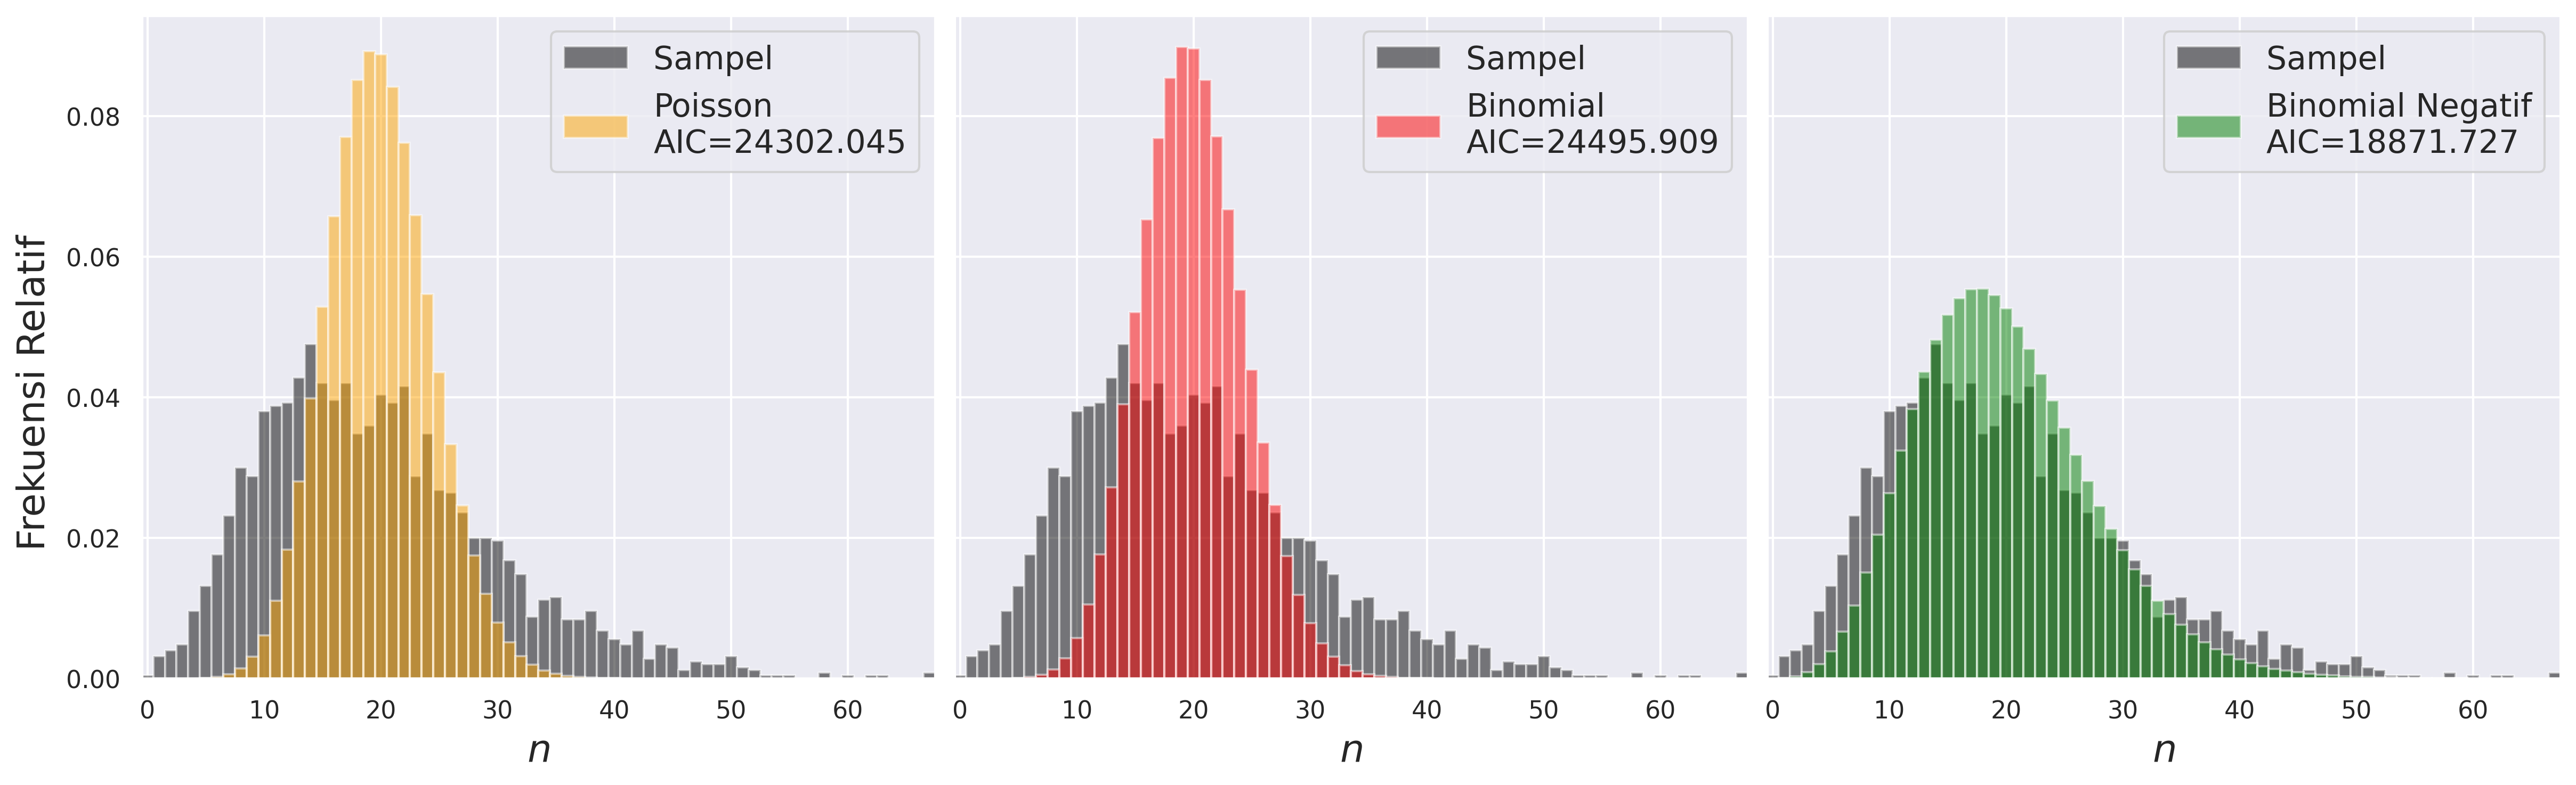

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 300})

x = np.arange(np.max(n)+1)

colors = ['orange', 'red', 'green']

fig, axs = plt.subplots(1, 3,
                        layout='constrained',
                        sharey='row',
                        figsize=[2.5*6.4, 4.8])

# Setting figure
fig.supylabel('Frekuensi Relatif', fontsize='x-large')

# Populating axes
for k, ax, color in zip(rvs, axs, colors):
    aic = 2*len(rvs[k].args) - 2*np.sum(rvs[k].logpmf(n))

    ax.hist(n, density=True, bins=np.arange(max(n)+2)-0.5,
            label='Sampel', color='black', alpha=0.5)
    ax.bar(x, rvs[k].pmf(x), width=1,
           label=f"{k}\nAIC={aic:.3f}", color=color, alpha=0.5)

    ax.legend(loc='best', fontsize='large')
    ax.set_xlabel('$n$', fontsize='x-large')
    ax.set_xlim([-0.5, np.max(n)+0.5])

plt.show()

Model Binomial Negatif adalah distribusi terbaik yang memodelkan frekuensi klaim perusahaan asuransi XYZ. Nilai AIC paling kecil dicapai oleh distribusi Binomial Negatif serta terlihat juga dari gambar bahwa diagram batang distribusi Poisson dan Binomial banyak tidak bersinggungan untuk nilai yang jauh dari rata-rata, sementara nilai di sekitar rata-ratanya terlalu besar.

Terlihat juga bahwa variansi sampel lebih besar daripada rata-ratanya. Distribusi Poisson memiliki variansi yang sama dengan rata-rata dan distribusi Binomial memiliki variansi yang lebih kecil dari rata-rata sehingga kedua model ini tidak cocok. Hal ini menyebabkan ketidakstabilan dari metode numerik untuk distribusi Binomial. $\epsilon \to 0$ menyebabkan $r \to \infty$ dan $p \to 0$ sehingga distribusi Binomial mendekati distribusi Poisson yang paling bisa mengakomodasi overdispersi (meskipun sebenarnya tidak bisa). Satu-satunya dari ketiga model yang memiliki variansi lebih besar dari rata-ratanya adalah Binomial Negatif.

#### Referensi

Tse, Yiu-Kuen. (2009). *Nonlife Actuarial Models Theory, Methods and Evaluation*. New York: Cambridge University Press.

Hogg, R., McKean, J., Craig, A. (2019) Introduction to Mathematical Statistics. 8th Edition. Boston: Pearson.

Taboga, Marco (2021). "Maximum likelihood - Numerical optimization algorithm", Lectures on probability theory and mathematical statistics. Kindle Direct Publishing. Online appendix. https://www.statlect.com/fundamentals-of-statistics/maximum-likelihood-algorithm.


Larson R. C. & Odoni A. R. (1981). *Urban operations research*. Prentice-Hall. https://web.mit.edu/urban_or_book/www/book/index.html.

Ben (https://stats.stackexchange.com/users/173082/ben), "Appropriate conditions" for method of moments estimator to exist, be consistent, and asymptotically normal?, URL (version: 2019-05-06): https://stats.stackexchange.com/q/406768

Marsaglia, G. (1972). "Choosing a Point from the Surface of a Sphere". Annals of Mathematical Statistics. 43 (2): 645–646. doi:10.1214/aoms/1177692644